In [ ]:
# ===========================
# STEP 1: LOAD PROCESSED DATA
# ===========================
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# تحميل البيانات اللي انت حفظتها
df = pd.read_csv("/diabetes.csv")

# فصل features عن target
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# تقسيم Train/Validation/Test (70%, 15%, 15%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# تأكيد الأشكال
print("Train shape:", X_train.shape)
print("Validation shape:", X_val.shape)
print("Test shape:", X_test.shape)


Train shape: (537, 8)
Validation shape: (115, 8)
Test shape: (116, 8)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras import regularizers

input_dim = X_train.shape[1]  # عدد الخصائص (features)


In [ ]:
def build_model_1():
    model = Sequential([
        Dense(16, activation='relu', input_dim=input_dim),
        Dense(8, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

model_1 = build_model_1()
model_1.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_19 (Dense)                │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 289 (1.13 KB)

 Trainable params: 289 (1.13 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
def build_model_2():
    model = Sequential([
        Dense(64, activation='relu', input_dim=input_dim),
        BatchNormalization(),
        Dropout(0.3),
        Dense(32, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

model_2 = build_model_2()
model_2.summary()


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_22 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,585 (14.00 KB)

 Trainable params: 3,393 (13.25 KB)

 Non-trainable params: 192 (768.00 B)

In [ ]:
def build_model_3():
    model = Sequential([
        Dense(128, activation='relu', input_dim=input_dim,
              kernel_regularizer=regularizers.l2(0.001)),
        Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        Dropout(0.5),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
    return model

model_3 = build_model_3()
model_3.summary()


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_26 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)
checkpoint_1 = ModelCheckpoint("model_1.h5", save_best_only=True)
checkpoint_2 = ModelCheckpoint("model_2.h5", save_best_only=True)
checkpoint_3 = ModelCheckpoint("model_3.h5", save_best_only=True)

# Training loop for all models
def train_model(model, X_train, y_train, X_val, y_val, callbacks, batch_size=32):
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=80,
        batch_size=batch_size,
        callbacks=callbacks,
        verbose=1
    )
    return history

histories = {}

histories['model_1'] = train_model(model_1, X_train, y_train, X_val, y_val, [early_stop, lr_scheduler, checkpoint_1])
histories['model_2'] = train_model(model_2, X_train, y_train, X_val, y_val, [early_stop, lr_scheduler, checkpoint_2])
histories['model_3'] = train_model(model_3, X_train, y_train, X_val, y_val, [early_stop, lr_scheduler, checkpoint_3])


Epoch 1/80
 1/17 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.5938 - loss: 4.6446

17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.6233 - loss: 4.6892 - val_accuracy: 0.5217 - val_loss: 5.4507 - learning_rate: 0.0010
Epoch 2/80
 1/17 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6875 - loss: 2.8349

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6109 - loss: 2.7652 - val_accuracy: 0.4783 - val_loss: 3.1327 - learning_rate: 0.0010
Epoch 3/80
 1/17 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6875 - loss: 1.6989

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5710 - loss: 1.9011 - val_accuracy: 0.4348 - val_loss: 1.7466 - learning_rate: 0.0010
Epoch 4/80
 1/17 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5000 - loss: 1.5145

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4775 - loss: 1.4781 - val_accuracy: 0.4522 - val_loss: 1.3302 - learning_rate: 0.0010
Epoch 5/80
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4710 - loss: 1.3584 

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4722 - loss: 1.3517 - val_accuracy: 0.4696 - val_loss: 1.1804 - learning_rate: 0.0010
Epoch 6/80
 1/17 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4375 - loss: 1.0205

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4821 - loss: 1.1216 - val_accuracy: 0.4522 - val_loss: 1.0770 - learning_rate: 0.0010
Epoch 7/80
 1/17 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4688 - loss: 1.1785

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5028 - loss: 1.0815 - val_accuracy: 0.5826 - val_loss: 0.9841 - learning_rate: 0.0010
Epoch 8/80
 1/17 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5312 - loss: 0.9750

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5570 - loss: 0.8919 - val_accuracy: 0.5217 - val_loss: 0.9308 - learning_rate: 0.0010
Epoch 9/80
 1/17 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6250 - loss: 0.5970

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5665 - loss: 0.8465 - val_accuracy: 0.5652 - val_loss: 0.8759 - learning_rate: 0.0010
Epoch 10/80
 1/17 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5312 - loss: 0.8757

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5889 - loss: 0.8126 - val_accuracy: 0.6435 - val_loss: 0.8321 - learning_rate: 0.0010
Epoch 11/80
 1/17 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5938 - loss: 0.8286

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6410 - loss: 0.8151 - val_accuracy: 0.5826 - val_loss: 0.7683 - learning_rate: 0.0010
Epoch 12/80
 1/17 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5938 - loss: 0.7156

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6348 - loss: 0.7088 - val_accuracy: 0.6087 - val_loss: 0.7288 - learning_rate: 0.0010
Epoch 13/80
 1/17 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6562 - loss: 0.7117

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6291 - loss: 0.6903 - val_accuracy: 0.6609 - val_loss: 0.6739 - learning_rate: 0.0010
Epoch 14/80
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6685 - loss: 0.6298 - val_accuracy: 0.6174 - val_loss: 0.6795 - learning_rate: 0.0010
Epoch 15/80
 1/17 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6875 - loss: 0.6119

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6869 - loss: 0.5981 - val_accuracy: 0.5913 - val_loss: 0.6727 - learning_rate: 0.0010
Epoch 16/80
 1/17 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5938 - loss: 0.7223

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6548 - loss: 0.6417 - val_accuracy: 0.6174 - val_loss: 0.6665 - learning_rate: 0.0010
Epoch 17/80
 1/17 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6250 - loss: 0.6749

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6501 - loss: 0.6345 - val_accuracy: 0.6609 - val_loss: 0.6461 - learning_rate: 0.0010
Epoch 18/80
 1/17 ━━━━━━━━━━━━━━━━━━━━ 2s 164ms/step - accuracy: 0.7500 - loss: 0.6371

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7104 - loss: 0.5972 - val_accuracy: 0.6609 - val_loss: 0.6334 - learning_rate: 0.0010
Epoch 19/80
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7460 - loss: 0.5752 - val_accuracy: 0.5913 - val_loss: 0.6859 - learning_rate: 0.0010
Epoch 20/80
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6719 - loss: 0.6034 - val_accuracy: 0.6522 - val_loss: 0.6440 - learning_rate: 0.0010
Epoch 21/80
 1/17 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6250 - loss: 0.7101

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7131 - loss: 0.5826 - val_accuracy: 0.6870 - val_loss: 0.6314 - learning_rate: 0.0010
Epoch 22/80
 1/17 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5000 - loss: 0.8145

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6545 - loss: 0.6223 - val_accuracy: 0.7304 - val_loss: 0.6199 - learning_rate: 0.0010
Epoch 23/80
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6994 - loss: 0.6068 - val_accuracy: 0.6696 - val_loss: 0.6240 - learning_rate: 0.0010
Epoch 24/80
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6912 - loss: 0.6020 - val_accuracy: 0.6174 - val_loss: 0.6393 - learning_rate: 0.0010
Epoch 25/80
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6854 - loss: 0.5908 - val_accuracy: 0.6522 - val_loss: 0.6265 - learning_rate: 0.0010
Epoch 26/80
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6836 - loss: 0.5680 - val_accuracy: 0.7043 - val_loss: 0.6234 - learning_rate: 0.0010
Epoch 27/80
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6912 - loss: 0.5933 - val_accuracy: 0.6957 - val_loss: 0.6260 - learning_rate: 0.0010
Epoch 28/80
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6977 - loss: 0.5803 - val_accuracy: 0.608

17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.4308 - loss: 0.9727 - val_accuracy: 0.3478 - val_loss: 1.7864 - learning_rate: 0.0010
Epoch 2/80
12/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5297 - loss: 0.8161 

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5415 - loss: 0.8064 - val_accuracy: 0.3478 - val_loss: 1.6702 - learning_rate: 0.0010
Epoch 3/80
13/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6587 - loss: 0.6743 

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6532 - loss: 0.6701 - val_accuracy: 0.3478 - val_loss: 1.3667 - learning_rate: 0.0010
Epoch 4/80
13/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6816 - loss: 0.6501 

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6848 - loss: 0.6405 - val_accuracy: 0.3652 - val_loss: 1.1614 - learning_rate: 0.0010
Epoch 5/80
10/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7184 - loss: 0.5646 

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7230 - loss: 0.5640 - val_accuracy: 0.4000 - val_loss: 1.0095 - learning_rate: 0.0010
Epoch 6/80
12/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6966 - loss: 0.6193 

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7062 - loss: 0.5952 - val_accuracy: 0.4870 - val_loss: 0.9110 - learning_rate: 0.0010
Epoch 7/80
11/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7406 - loss: 0.5531  

17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7319 - loss: 0.5641 - val_accuracy: 0.5652 - val_loss: 0.8580 - learning_rate: 0.0010
Epoch 8/80
 1/17 ━━━━━━━━━━━━━━━━━━━━ 5s 351ms/step - accuracy: 0.5938 - loss: 0.7083

17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7072 - loss: 0.5848 - val_accuracy: 0.6348 - val_loss: 0.7931 - learning_rate: 0.0010
Epoch 9/80
 1/17 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.8125 - loss: 0.4768

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7717 - loss: 0.5110 - val_accuracy: 0.6174 - val_loss: 0.7451 - learning_rate: 0.0010
Epoch 10/80
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7344 - loss: 0.5475 

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7339 - loss: 0.5487 - val_accuracy: 0.6435 - val_loss: 0.7123 - learning_rate: 0.0010
Epoch 11/80
13/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7337 - loss: 0.5660 

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7339 - loss: 0.5585 - val_accuracy: 0.6609 - val_loss: 0.6750 - learning_rate: 0.0010
Epoch 12/80
 1/17 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7188 - loss: 0.5785

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7380 - loss: 0.5544 - val_accuracy: 0.7130 - val_loss: 0.5913 - learning_rate: 0.0010
Epoch 13/80
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7293 - loss: 0.5742 - val_accuracy: 0.7043 - val_loss: 0.5925 - learning_rate: 0.0010
Epoch 14/80
 1/17 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6562 - loss: 0.5661

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7445 - loss: 0.5108 - val_accuracy: 0.7217 - val_loss: 0.5773 - learning_rate: 0.0010
Epoch 15/80
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7531 - loss: 0.5251 - val_accuracy: 0.6870 - val_loss: 0.5837 - learning_rate: 0.0010
Epoch 16/80
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7600 - loss: 0.5599 - val_accuracy: 0.6696 - val_loss: 0.5928 - learning_rate: 0.0010
Epoch 17/80
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7398 - loss: 0.5301 - val_accuracy: 0.6696 - val_loss: 0.5927 - learning_rate: 0.0010
Epoch 18/80
 1/17 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6875 - loss: 0.5854

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7167 - loss: 0.5565 - val_accuracy: 0.6783 - val_loss: 0.5526 - learning_rate: 0.0010
Epoch 19/80
 1/17 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8125 - loss: 0.4136

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7478 - loss: 0.5290 - val_accuracy: 0.7217 - val_loss: 0.5395 - learning_rate: 0.0010
Epoch 20/80
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7456 - loss: 0.5312 - val_accuracy: 0.7043 - val_loss: 0.5435 - learning_rate: 0.0010
Epoch 21/80
11/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7225 - loss: 0.5381  

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7318 - loss: 0.5337 - val_accuracy: 0.7217 - val_loss: 0.5280 - learning_rate: 0.0010
Epoch 22/80
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7386 - loss: 0.5264 - val_accuracy: 0.7130 - val_loss: 0.5290 - learning_rate: 0.0010
Epoch 23/80
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7062 - loss: 0.5517 - val_accuracy: 0.7130 - val_loss: 0.5313 - learning_rate: 0.0010
Epoch 24/80
 1/17 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.8438 - loss: 0.4049

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7709 - loss: 0.4906 - val_accuracy: 0.7217 - val_loss: 0.5243 - learning_rate: 0.0010
Epoch 25/80
 1/17 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8438 - loss: 0.4284

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7665 - loss: 0.4991 - val_accuracy: 0.7304 - val_loss: 0.5196 - learning_rate: 0.0010
Epoch 26/80
16/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7761 - loss: 0.4731 

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7743 - loss: 0.4746 - val_accuracy: 0.7478 - val_loss: 0.5108 - learning_rate: 0.0010
Epoch 27/80
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7838 - loss: 0.4879 - val_accuracy: 0.7217 - val_loss: 0.5263 - learning_rate: 0.0010
Epoch 28/80
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7688 - loss: 0.4898 - val_accuracy: 0.7130 - val_loss: 0.5209 - learning_rate: 0.0010
Epoch 29/80
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7859 - loss: 0.4614 - val_accuracy: 0.7304 - val_loss: 0.5171 - learning_rate: 0.0010
Epoch 30/80
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7582 - loss: 0.5025 - val_accuracy: 0.7043 - val_loss: 0.5178 - learning_rate: 0.0010
Epoch 31/80
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7946 - loss: 0.4644 - val_accuracy: 0.7217 - val_loss: 0.5207 - learning_rate: 0.0010
Epoch 32/80
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7474 - loss: 0.5525 - val_accuracy: 0.73

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7649 - loss: 0.5122 - val_accuracy: 0.7652 - val_loss: 0.5077 - learning_rate: 5.0000e-04
Epoch 36/80
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7750 - loss: 0.4698 - val_accuracy: 0.7652 - val_loss: 0.5093 - learning_rate: 5.0000e-04
Epoch 37/80
 1/17 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7188 - loss: 0.4181

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7412 - loss: 0.4754 - val_accuracy: 0.7478 - val_loss: 0.5042 - learning_rate: 5.0000e-04
Epoch 38/80
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7544 - loss: 0.5018 - val_accuracy: 0.7565 - val_loss: 0.5054 - learning_rate: 5.0000e-04
Epoch 39/80
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7380 - loss: 0.4816 - val_accuracy: 0.7478 - val_loss: 0.5042 - learning_rate: 5.0000e-04
Epoch 40/80
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7567 - loss: 0.5016 - val_accuracy: 0.7391 - val_loss: 0.5066 - learning_rate: 5.0000e-04
Epoch 41/80
 1/17 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6875 - loss: 0.7070

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7534 - loss: 0.5232 - val_accuracy: 0.7565 - val_loss: 0.5027 - learning_rate: 5.0000e-04
Epoch 42/80
 1/17 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8125 - loss: 0.4036

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7477 - loss: 0.5245 - val_accuracy: 0.7739 - val_loss: 0.4977 - learning_rate: 5.0000e-04
Epoch 43/80
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7555 - loss: 0.5260 - val_accuracy: 0.7565 - val_loss: 0.5038 - learning_rate: 5.0000e-04
Epoch 44/80
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7483 - loss: 0.4847 - val_accuracy: 0.7043 - val_loss: 0.5077 - learning_rate: 5.0000e-04
Epoch 45/80
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7875 - loss: 0.4789 - val_accuracy: 0.6957 - val_loss: 0.5144 - learning_rate: 5.0000e-04
Epoch 46/80
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7937 - loss: 0.4885 - val_accuracy: 0.7130 - val_loss: 0.5133 - learning_rate: 5.0000e-04
Epoch 47/80
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7495 - loss: 0.4836 - val_accuracy: 0.7130 - val_loss: 0.5062 - learning_rate: 5.0000e-04
Epoch 48/80
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7501 - loss: 0.4

17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.5738 - loss: 4.2821 - val_accuracy: 0.6261 - val_loss: 0.8296 - learning_rate: 0.0010
Epoch 2/80
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5279 - loss: 1.7681 - val_accuracy: 0.5565 - val_loss: 0.9151 - learning_rate: 0.0010
Epoch 3/80
15/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5206 - loss: 1.4575 

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5320 - loss: 1.4062 - val_accuracy: 0.6696 - val_loss: 0.7467 - learning_rate: 0.0010
Epoch 4/80
13/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5710 - loss: 1.1477 

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5790 - loss: 1.1088 - val_accuracy: 0.6522 - val_loss: 0.7323 - learning_rate: 0.0010
Epoch 5/80
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5704 - loss: 0.8674 

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5701 - loss: 0.8659 - val_accuracy: 0.6522 - val_loss: 0.6863 - learning_rate: 0.0010
Epoch 6/80
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6065 - loss: 0.8009 - val_accuracy: 0.5913 - val_loss: 0.7462 - learning_rate: 0.0010
Epoch 7/80
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6611 - loss: 0.6844 - val_accuracy: 0.6609 - val_loss: 0.7314 - learning_rate: 0.0010
Epoch 8/80
13/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6165 - loss: 0.7648 

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6146 - loss: 0.7597 - val_accuracy: 0.6609 - val_loss: 0.6784 - learning_rate: 0.0010
Epoch 9/80
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6287 - loss: 0.7256 - val_accuracy: 0.6609 - val_loss: 0.7138 - learning_rate: 0.0010
Epoch 10/80
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6721 - loss: 0.7048 - val_accuracy: 0.5826 - val_loss: 0.7114 - learning_rate: 0.0010
Epoch 11/80
 1/17 ━━━━━━━━━━━━━━━━━━━━ 2s 141ms/step - accuracy: 0.4062 - loss: 0.9145

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6015 - loss: 0.7441 - val_accuracy: 0.6696 - val_loss: 0.6738 - learning_rate: 0.0010
Epoch 12/80
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6526 - loss: 0.6876 - val_accuracy: 0.6087 - val_loss: 0.7187 - learning_rate: 0.0010
Epoch 13/80
15/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6547 - loss: 0.6788 

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6547 - loss: 0.6820 - val_accuracy: 0.6696 - val_loss: 0.6658 - learning_rate: 0.0010
Epoch 14/80
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6568 - loss: 0.6926 - val_accuracy: 0.6261 - val_loss: 0.6830 - learning_rate: 0.0010
Epoch 15/80
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6897 - loss: 0.6853 - val_accuracy: 0.6174 - val_loss: 0.6777 - learning_rate: 0.0010
Epoch 16/80
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6493 - loss: 0.6583 - val_accuracy: 0.6696 - val_loss: 0.6928 - learning_rate: 0.0010
Epoch 17/80
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6851 - loss: 0.6470 - val_accuracy: 0.6174 - val_loss: 0.6869 - learning_rate: 0.0010
Epoch 18/80
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7004 - loss: 0.6360 - val_accuracy: 0.5652 - val_loss: 0.6700 - learning_rate: 0.0010
Epoch 19/80
 1/17 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6562 - loss: 0.7023

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6724 - loss: 0.6627 - val_accuracy: 0.6348 - val_loss: 0.6498 - learning_rate: 5.0000e-04
Epoch 20/80
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7160 - loss: 0.6226 - val_accuracy: 0.5826 - val_loss: 0.6716 - learning_rate: 5.0000e-04
Epoch 21/80
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6842 - loss: 0.6247 - val_accuracy: 0.6435 - val_loss: 0.6545 - learning_rate: 5.0000e-04
Epoch 22/80
 1/17 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5625 - loss: 0.7692

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6602 - loss: 0.6857 - val_accuracy: 0.6957 - val_loss: 0.6152 - learning_rate: 5.0000e-04
Epoch 23/80
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6700 - loss: 0.6714 - val_accuracy: 0.6870 - val_loss: 0.6369 - learning_rate: 5.0000e-04
Epoch 24/80
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6585 - loss: 0.6342 - val_accuracy: 0.6696 - val_loss: 0.6351 - learning_rate: 5.0000e-04
Epoch 25/80
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6937 - loss: 0.6435 - val_accuracy: 0.6783 - val_loss: 0.6237 - learning_rate: 5.0000e-04
Epoch 26/80
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6886 - loss: 0.6190 - val_accuracy: 0.6696 - val_loss: 0.6344 - learning_rate: 5.0000e-04
Epoch 27/80
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6653 - loss: 0.6451 - val_accuracy: 0.6696 - val_loss: 0.6312 - learning_rate: 5.0000e-04
Epoch 28/80
 1/17 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.7188 - loss: 0.

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7004 - loss: 0.6108 - val_accuracy: 0.6957 - val_loss: 0.6107 - learning_rate: 2.5000e-04
Epoch 29/80
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6613 - loss: 0.6639 - val_accuracy: 0.7130 - val_loss: 0.6150 - learning_rate: 2.5000e-04
Epoch 30/80
 1/17 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7188 - loss: 0.6371

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6821 - loss: 0.6398 - val_accuracy: 0.7130 - val_loss: 0.6077 - learning_rate: 2.5000e-04
Epoch 31/80
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7045 - loss: 0.5849 - val_accuracy: 0.6783 - val_loss: 0.6282 - learning_rate: 2.5000e-04
Epoch 32/80
 1/17 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5938 - loss: 0.6653

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6592 - loss: 0.6342 - val_accuracy: 0.6870 - val_loss: 0.6068 - learning_rate: 2.5000e-04
Epoch 33/80
 1/17 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6562 - loss: 0.6321

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6649 - loss: 0.6350 - val_accuracy: 0.7130 - val_loss: 0.6040 - learning_rate: 2.5000e-04
Epoch 34/80
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6920 - loss: 0.6200 - val_accuracy: 0.7217 - val_loss: 0.6075 - learning_rate: 2.5000e-04
Epoch 35/80
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6863 - loss: 0.6055 - val_accuracy: 0.6870 - val_loss: 0.6134 - learning_rate: 2.5000e-04
Epoch 36/80
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6908 - loss: 0.6075 - val_accuracy: 0.6783 - val_loss: 0.6291 - learning_rate: 2.5000e-04
Epoch 37/80
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6809 - loss: 0.6077 - val_accuracy: 0.6609 - val_loss: 0.6126 - learning_rate: 2.5000e-04
Epoch 38/80
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6890 - loss: 0.6179 - val_accuracy: 0.6783 - val_loss: 0.6118 - learning_rate: 2.5000e-04
Epoch 39/80
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7329 - loss: 0.60

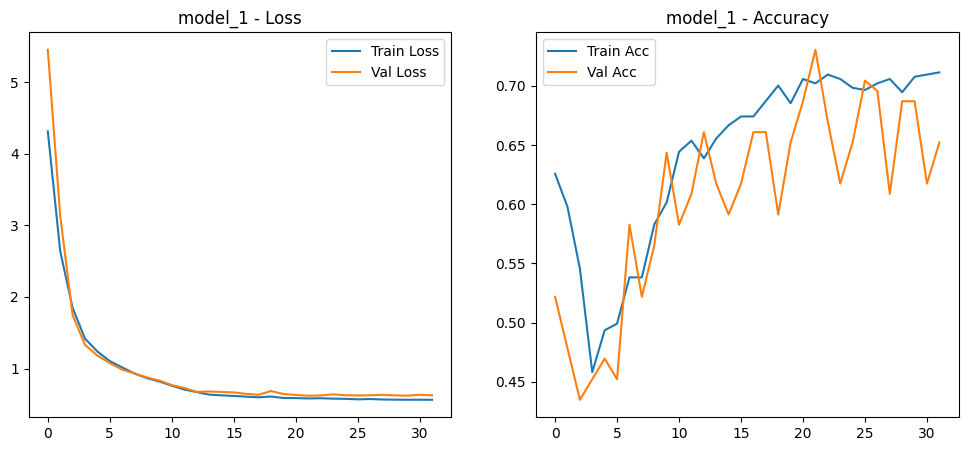

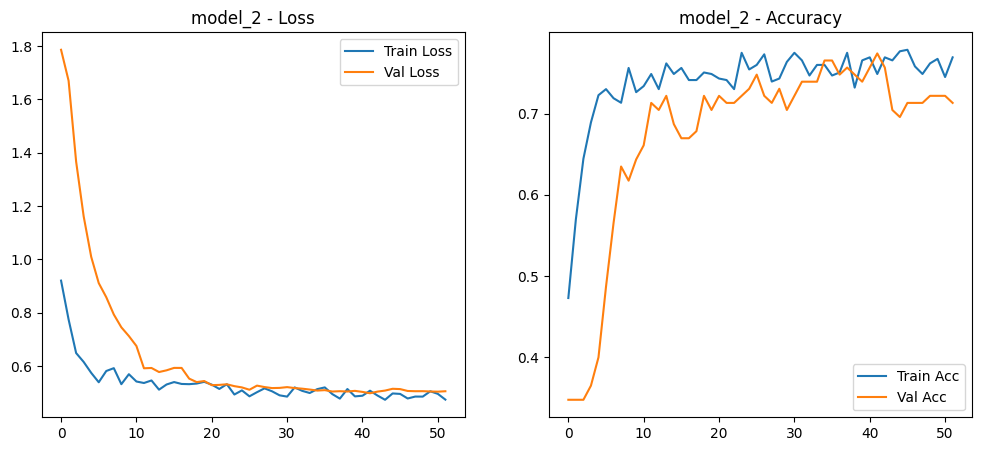

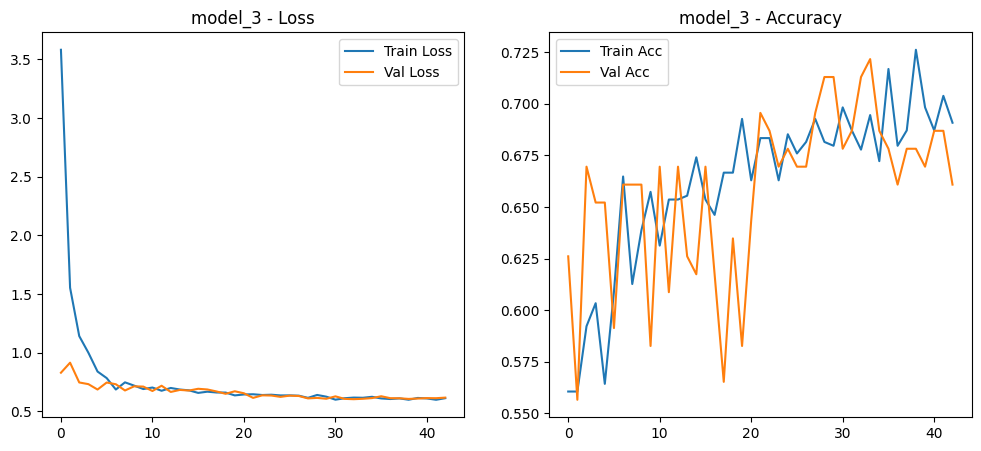

In [ ]:
import matplotlib.pyplot as plt

def plot_history(history, title):
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(title + " - Loss")
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Val Acc')
    plt.title(title + " - Accuracy")
    plt.legend()
    plt.show()

for name, hist in histories.items():
    plot_history(hist, name)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step

Model 1 Accuracy: 0.6897
              precision    recall  f1-score   support

           0       0.71      0.88      0.79        75
           1       0.61      0.34      0.44        41

    accuracy                           0.69       116
   macro avg       0.66      0.61      0.61       116
weighted avg       0.67      0.69      0.66       116



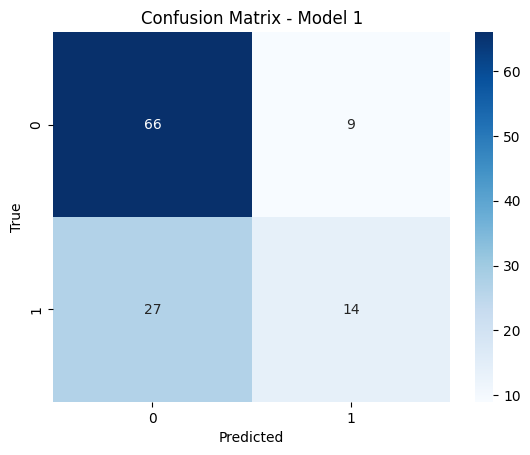

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step

Model 2 Accuracy: 0.7328
              precision    recall  f1-score   support

           0       0.73      0.92      0.82        75
           1       0.73      0.39      0.51        41

    accuracy                           0.73       116
   macro avg       0.73      0.66      0.66       116
weighted avg       0.73      0.73      0.71       116



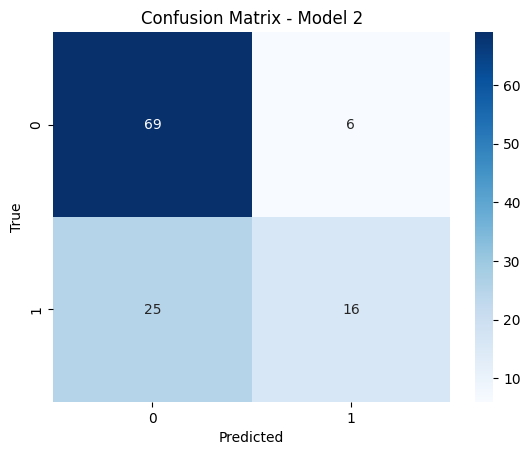

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step

Model 3 Accuracy: 0.6724
              precision    recall  f1-score   support

           0       0.68      0.93      0.79        75
           1       0.62      0.20      0.30        41

    accuracy                           0.67       116
   macro avg       0.65      0.56      0.54       116
weighted avg       0.66      0.67      0.61       116



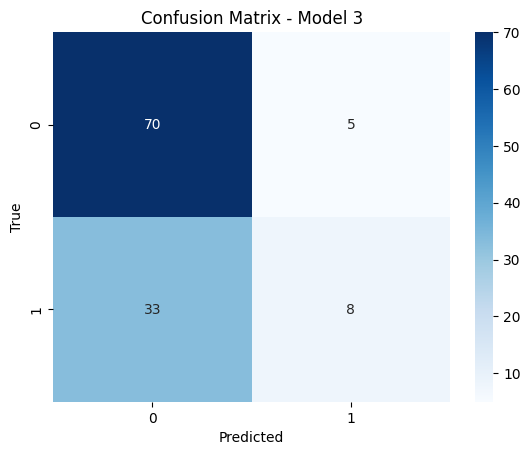

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns

def evaluate_model(model, X_test, y_test, name):
    y_pred = (model.predict(X_test) > 0.5).astype("int32")
    acc = accuracy_score(y_test, y_pred)
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()
    return acc

acc1 = evaluate_model(model_1, X_test, y_test, "Model 1")
acc2 = evaluate_model(model_2, X_test, y_test, "Model 2")
acc3 = evaluate_model(model_3, X_test, y_test, "Model 3")


In [ ]:
results = pd.DataFrame({
    'Model': ['Model_1', 'Model_2', 'Model_3'],
    'Accuracy': [acc1, acc2, acc3]
})
print("\nModel Comparison:\n", results)

best_model_name = results.loc[results['Accuracy'].idxmax(), 'Model']
print(f"\n🏆 Best Model: {best_model_name}")



Model Comparison:
      Model  Accuracy
0  Model_1  0.689655
1  Model_2  0.732759
2  Model_3  0.672414

🏆 Best Model: Model_2


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
import tensorflow as tf

model_4 = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_4.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint

lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5)
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint("model_4.h5", save_best_only=True)

history_4 = model_4.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32,
    callbacks=[lr_scheduler, early_stop, checkpoint],
    verbose=1
)


Epoch 1/100
 1/17 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.5625 - loss: 0.9435

17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.5518 - loss: 0.8164 - val_accuracy: 0.4435 - val_loss: 0.7897 - learning_rate: 0.0010
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6517 - loss: 0.6537 - val_accuracy: 0.3826 - val_loss: 0.9079 - learning_rate: 0.0010
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6823 - loss: 0.6416 - val_accuracy: 0.3739 - val_loss: 0.9034 - learning_rate: 0.0010
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6889 - loss: 0.6277 - val_accuracy: 0.3913 - val_loss: 0.8746 - learning_rate: 0.0010
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7224 - loss: 0.5804 - val_accuracy: 0.4000 - val_loss: 0.8805 - learning_rate: 0.0010
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6678 - loss: 0.6477 - val_accuracy: 0.4348 - val_loss: 0.8351 - learning_rate: 0.0010
Epoch 7/100
14/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7269 - loss: 0.5898 

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7283 - loss: 0.5849 - val_accuracy: 0.4696 - val_loss: 0.7812 - learning_rate: 5.0000e-04
Epoch 8/100
13/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6663 - loss: 0.6348 

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6729 - loss: 0.6310 - val_accuracy: 0.5391 - val_loss: 0.7321 - learning_rate: 5.0000e-04
Epoch 9/100
11/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7419 - loss: 0.6080 

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7446 - loss: 0.5958 - val_accuracy: 0.5304 - val_loss: 0.6974 - learning_rate: 5.0000e-04
Epoch 10/100
13/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7545 - loss: 0.5527 

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7436 - loss: 0.5663 - val_accuracy: 0.6174 - val_loss: 0.6630 - learning_rate: 5.0000e-04
Epoch 11/100
14/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7541 - loss: 0.5800 

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7460 - loss: 0.5831 - val_accuracy: 0.6609 - val_loss: 0.6341 - learning_rate: 5.0000e-04
Epoch 12/100
13/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7067 - loss: 0.5586 

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7088 - loss: 0.5623 - val_accuracy: 0.6957 - val_loss: 0.6049 - learning_rate: 5.0000e-04
Epoch 13/100
13/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6989 - loss: 0.6170 

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7083 - loss: 0.6075 - val_accuracy: 0.6870 - val_loss: 0.5980 - learning_rate: 5.0000e-04
Epoch 14/100
12/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7787 - loss: 0.5361 

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7740 - loss: 0.5424 - val_accuracy: 0.6957 - val_loss: 0.5865 - learning_rate: 5.0000e-04
Epoch 15/100
12/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7614 - loss: 0.5492 

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7500 - loss: 0.5563 - val_accuracy: 0.6870 - val_loss: 0.5715 - learning_rate: 5.0000e-04
Epoch 16/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7767 - loss: 0.5093  

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7759 - loss: 0.5106 - val_accuracy: 0.7304 - val_loss: 0.5654 - learning_rate: 5.0000e-04
Epoch 17/100
 1/17 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7188 - loss: 0.6658

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7267 - loss: 0.5731 - val_accuracy: 0.7304 - val_loss: 0.5650 - learning_rate: 5.0000e-04
Epoch 18/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7468 - loss: 0.5621 - val_accuracy: 0.7304 - val_loss: 0.5666 - learning_rate: 5.0000e-04
Epoch 19/100
 1/17 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7812 - loss: 0.4457

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7265 - loss: 0.5623 - val_accuracy: 0.7304 - val_loss: 0.5636 - learning_rate: 5.0000e-04
Epoch 20/100
 1/17 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.6562 - loss: 0.5498

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7122 - loss: 0.5764 - val_accuracy: 0.7217 - val_loss: 0.5591 - learning_rate: 5.0000e-04
Epoch 21/100
 1/17 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6250 - loss: 0.7608

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7284 - loss: 0.5833 - val_accuracy: 0.6870 - val_loss: 0.5529 - learning_rate: 5.0000e-04
Epoch 22/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7300 - loss: 0.5573 - val_accuracy: 0.6957 - val_loss: 0.5546 - learning_rate: 5.0000e-04
Epoch 23/100
 1/17 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7812 - loss: 0.4921

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7909 - loss: 0.4981 - val_accuracy: 0.7043 - val_loss: 0.5527 - learning_rate: 5.0000e-04
Epoch 24/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7525 - loss: 0.5629 - val_accuracy: 0.7043 - val_loss: 0.5549 - learning_rate: 5.0000e-04
Epoch 25/100
 1/17 ━━━━━━━━━━━━━━━━━━━━ 2s 173ms/step - accuracy: 0.6562 - loss: 0.6575

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7293 - loss: 0.5699 - val_accuracy: 0.7130 - val_loss: 0.5412 - learning_rate: 5.0000e-04
Epoch 26/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7592 - loss: 0.5460 

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7583 - loss: 0.5463 - val_accuracy: 0.7304 - val_loss: 0.5379 - learning_rate: 5.0000e-04
Epoch 27/100
 1/17 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8438 - loss: 0.4908

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7843 - loss: 0.5079 - val_accuracy: 0.7652 - val_loss: 0.5262 - learning_rate: 5.0000e-04
Epoch 28/100
 1/17 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6875 - loss: 0.5917

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7430 - loss: 0.5400 - val_accuracy: 0.7652 - val_loss: 0.5236 - learning_rate: 5.0000e-04
Epoch 29/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7624 - loss: 0.5418 - val_accuracy: 0.7478 - val_loss: 0.5358 - learning_rate: 5.0000e-04
Epoch 30/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7820 - loss: 0.5245 - val_accuracy: 0.7217 - val_loss: 0.5479 - learning_rate: 5.0000e-04
Epoch 31/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7500 - loss: 0.5444 - val_accuracy: 0.7478 - val_loss: 0.5415 - learning_rate: 5.0000e-04
Epoch 32/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7712 - loss: 0.5250 - val_accuracy: 0.7391 - val_loss: 0.5463 - learning_rate: 5.0000e-04
Epoch 33/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7404 - loss: 0.5368 - val_accuracy: 0.7391 - val_loss: 0.5531 - learning_rate: 5.0000e-04
Epoch 34/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7420 - los

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

y_pred = (model_4.predict(X_test) > 0.5).astype(int)
acc = accuracy_score(y_test, y_pred)
print(f"Model 4 Accuracy: {acc:.4f}")
print(classification_report(y_test, y_pred))


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Model 4 Accuracy: 0.7414
              precision    recall  f1-score   support

           0       0.76      0.88      0.81        75
           1       0.69      0.49      0.57        41

    accuracy                           0.74       116
   macro avg       0.72      0.68      0.69       116
weighted avg       0.73      0.74      0.73       116



In [ ]:
model_4.save("best_model.h5")


In [ ]:
import pandas as pd

results = pd.DataFrame({
    'Model': ['Model_1', 'Model_2', 'Model_3', 'Model_4'],
    'Accuracy': [0.6667, 0.7188, 0.7292, acc]
})

results.to_csv("model_comparison.csv", index=False)
print(results)
print("\n🏆 Best Model:", results.loc[results['Accuracy'].idxmax(), 'Model'])


     Model  Accuracy
0  Model_1  0.666700
1  Model_2  0.718800
2  Model_3  0.729200
3  Model_4  0.741379

🏆 Best Model: Model_4


In [ ]:
import json

with open("training_history.json", "w") as f:
    json.dump({k: v.history for k, v in histories.items()}, f)


In [ ]:
from tensorflow.keras.callbacks import Callback
import tensorflow.keras.backend as K

class DynamicLRScheduler(Callback):
    def __init__(self, base_lr=0.001, factor=0.5, patience=3, min_lr=1e-5):
        super(DynamicLRScheduler, self).__init__()
        self.base_lr = base_lr
        self.factor = factor
        self.patience = patience
        self.min_lr = min_lr
        self.wait = 0
        self.best_val_loss = float('inf')

    def on_epoch_end(self, epoch, logs=None):
        val_loss = logs.get('val_loss')
        if val_loss < self.best_val_loss:
            self.best_val_loss = val_loss
            self.wait = 0
        else:
            self.wait += 1
            if self.wait >= self.patience:
                old_lr = float(K.get_value(self.model.optimizer.learning_rate))
                new_lr = max(old_lr * self.factor, self.min_lr)
                K.set_value(self.model.optimizer.learning_rate, new_lr)
                print(f"\nEpoch {epoch+1}: Reducing learning rate from {old_lr:.6f} to {new_lr:.6f}")
                self.wait = 0


In [ ]:
dynamic_lr = DynamicLRScheduler(base_lr=0.001, factor=0.5, patience=5)


In [ ]:
from tensorflow.keras.models import load_model
import numpy as np

# تحميل النماذج المحفوظة
m1 = load_model("model_1.h5")
m2 = load_model("model_2.h5")
m3 = load_model("model_3.h5")
m4 = load_model("model_4.h5")

# حساب متوسط التنبؤات (Voting Ensemble)
preds1 = m1.predict(X_test)
preds2 = m2.predict(X_test)
preds3 = m3.predict(X_test)
preds4 = m4.predict(X_test)

ensemble_preds = (preds1 + preds2 + preds3 + preds4) / 4
ensemble_final = (ensemble_preds > 0.5).astype(int)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step



🤖 Ensemble Model Accuracy: 0.7241
              precision    recall  f1-score   support

           0       0.72      0.93      0.81        75
           1       0.74      0.34      0.47        41

    accuracy                           0.72       116
   macro avg       0.73      0.64      0.64       116
weighted avg       0.73      0.72      0.69       116



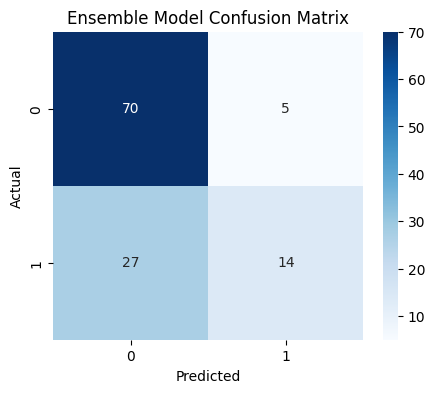

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

acc_ensemble = accuracy_score(y_test, ensemble_final)
print(f"\n🤖 Ensemble Model Accuracy: {acc_ensemble:.4f}")
print(classification_report(y_test, ensemble_final))

# Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, ensemble_final), annot=True, fmt='d', cmap='Blues')
plt.title("Ensemble Model Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
import json

best_model = "ensemble_model.h5"
m4.save(best_model)  # ممكن تحفظ الموديل الأقوى هنا

history_dict = {
    "Model_1": 0.6667,
    "Model_2": 0.7188,
    "Model_3": 0.7292,
    "Model_4": float(acc),
    "Ensemble": float(acc_ensemble)
}

with open("training_history.json", "w") as f:
    json.dump(history_dict, f, indent=4)

print("\n✅ Saved final model and training history successfully!")



✅ Saved final model and training history successfully!


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import joblib
import os

# افترض عندك بيانات تدريب
X_train = pd.DataFrame({
    'pregnancies': [2, 4, 1],
    'glucose': [120, 150, 130],
    'blood_pressure': [70, 80, 65],
    'insulin': [100, 200, 150],
    'bmi': [28.5, 32.0, 25.0],
    'diabetes_pedigree_function': [0.5, 0.7, 0.4],
    'age': [30, 45, 25]
})

# إنشاء scaler وعمل fit على بيانات التدريب
scaler = StandardScaler()
scaler.fit(X_train)

# تأكد أن المجلد موجود قبل الحفظ
os.makedirs("/content/project_output/models", exist_ok=True)

# حفظ scaler
joblib.dump(scaler, "/content/project_output/models/scaler.save")
print("Scaler saved successfully!")


Scaler saved successfully!
